# Car Price Prediction

### Business Objective:
The project is aimed to understand the factors on which the pricing of car depends. This project is to know:
>-  Which variables are significant in predicting the price of a car.
>-  How well those variables describe the price of a car.




In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the data
pricing = pd.read_csv("CarPrice_Assignment.csv")

# Check the head of the dataset
pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [3]:
print(pricing.shape)
print('\n')
print(pricing.info())

(205, 26)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
p

In [4]:
pricing.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,peugeot 504,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


## Data Cleaning

In [5]:
pricing.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

We know that __CarName__ column has the company name followed by car name. Let's seperate the company name and observe

In [6]:
pricing.CarName = pricing.CarName.str.split(' ').apply(lambda x: x[0].lower())
pricing.CarName.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarName, dtype: int64

It can be seen that there are typos in the company names. Let's correct those. 

In [7]:
pricing.CarName = pricing.CarName.replace({'alfa-romero':'alfa-romeo','maxda':'mazda','porcschce':'porsche','toyouta':'toyota','vokswagen':'volkswagen',
                                           'vw':'volkswagen'})
pricing = pricing.rename(columns = ({'CarName':'company'}))
pricing.company.value_counts().sort_index()

alfa-romeo     3
audi           7
bmw            8
buick          8
chevrolet      3
dodge          9
honda         13
isuzu          4
jaguar         3
mazda         17
mercury        1
mitsubishi    13
nissan        18
peugeot       11
plymouth       7
porcshce       1
porsche        4
renault        2
saab           6
subaru        12
toyota        32
volkswagen    12
volvo         11
Name: company, dtype: int64

According to data dictionary, symboling column is categorical. We should change the datatype to object

In [8]:
pricing.symboling = pricing.symboling.astype(np.object)

In [9]:
cat_column = pricing.select_dtypes(include = np.object).columns.tolist()
print(len(cat_column))
print('\n')
print(cat_column)

11


['symboling', 'company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


Check all categorical columns individually

In [10]:
for i in cat_column:
    print(pricing[i].value_counts())
    print('\n')

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
volvo         11
peugeot       11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        4
isuzu          4
jaguar         3
alfa-romeo     3
chevrolet      3
renault        2
mercury        1
porcshce       1
Name: company, dtype: int64


gas       185
diesel     20
Name: fueltype, dtype: int64


std      168
turbo     37
Name: aspiration, dtype: int64


four    115
two      90
Name: doornumber, dtype: int64


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


front    202
rear       3
Name: enginelocation, dtype: int64


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
roto

**`Car-Id`** column has unique values of Id. So we can drop that column

In [11]:
#Dropping the car-Id column from dataset

pricing = pricing.drop('car_ID',axis=1)
pricing.head()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


Creating a list of all numerical columns in the dataset

In [12]:
num_column = pricing.select_dtypes(exclude=np.object).columns.tolist()
print(num_column)
print('\n')
print(len(num_column))

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


14


In [13]:
#Let's drop the duplicates if present

pricing = pricing.drop_duplicates()
pricing.shape

(205, 25)

In [14]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
company             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

### Deriving Metrics

We can calculate the **cubic centimeter(CC)** of the car engine using boreratio, stroke and cylindernumber variable

Cubic centimeter(cc) or Engine Displacement = $\pi * (\frac{compression   ratio}{2})^2 * strokelength * numberofcylinders$

In [15]:
#Assigning all values to a new variable and applying the above formula by creating a new column 'engine_cc'
y=pricing.boreratio
z=pricing.stroke
l= pricing.cylindernumber.replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3}).astype(float)

pricing['engine_cc'] = math.pi * (y/2)**2 * z * l
pricing.head()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,engine_cc
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000,101.377976
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000,101.377976
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000,117.446531
3,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000,108.695147
4,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000,135.868934


In [16]:
# Updating the numerical columns list
num_column = pricing.select_dtypes(exclude=np.object).columns.tolist()
print(num_column)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'engine_cc']


## Data Visualisation

### Univariate Analysis

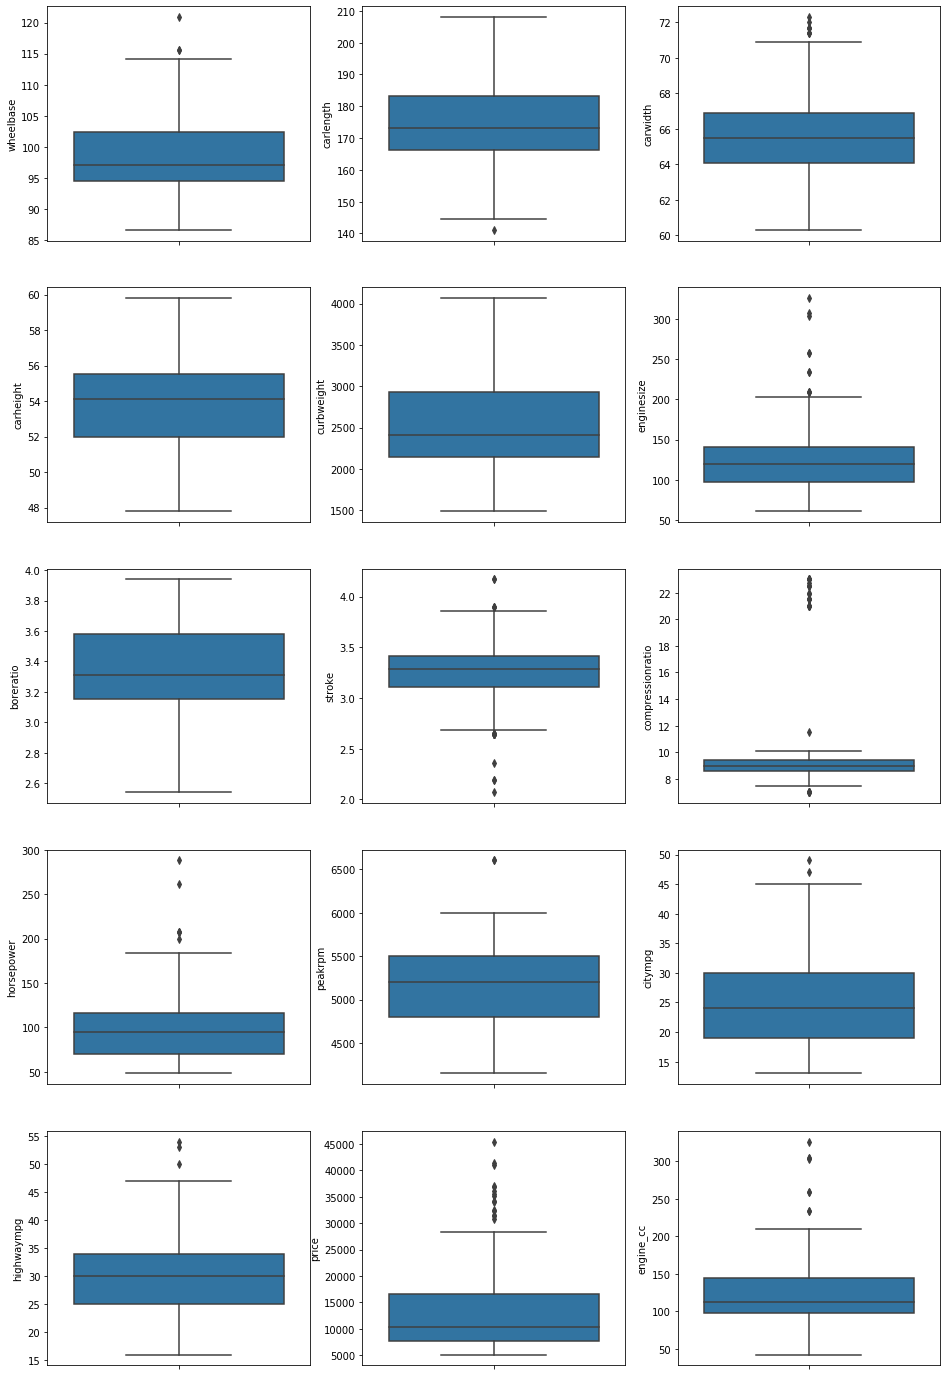

In [17]:
plt.figure(figsize=(16,25))
for i,j in enumerate(num_column):
    plt.subplot(5,3,i+1)
    sns.boxplot(y = pricing[j])

From the above plots, we can see that outliers are present in most columns. Since we have less data we should skip the outlier treatment

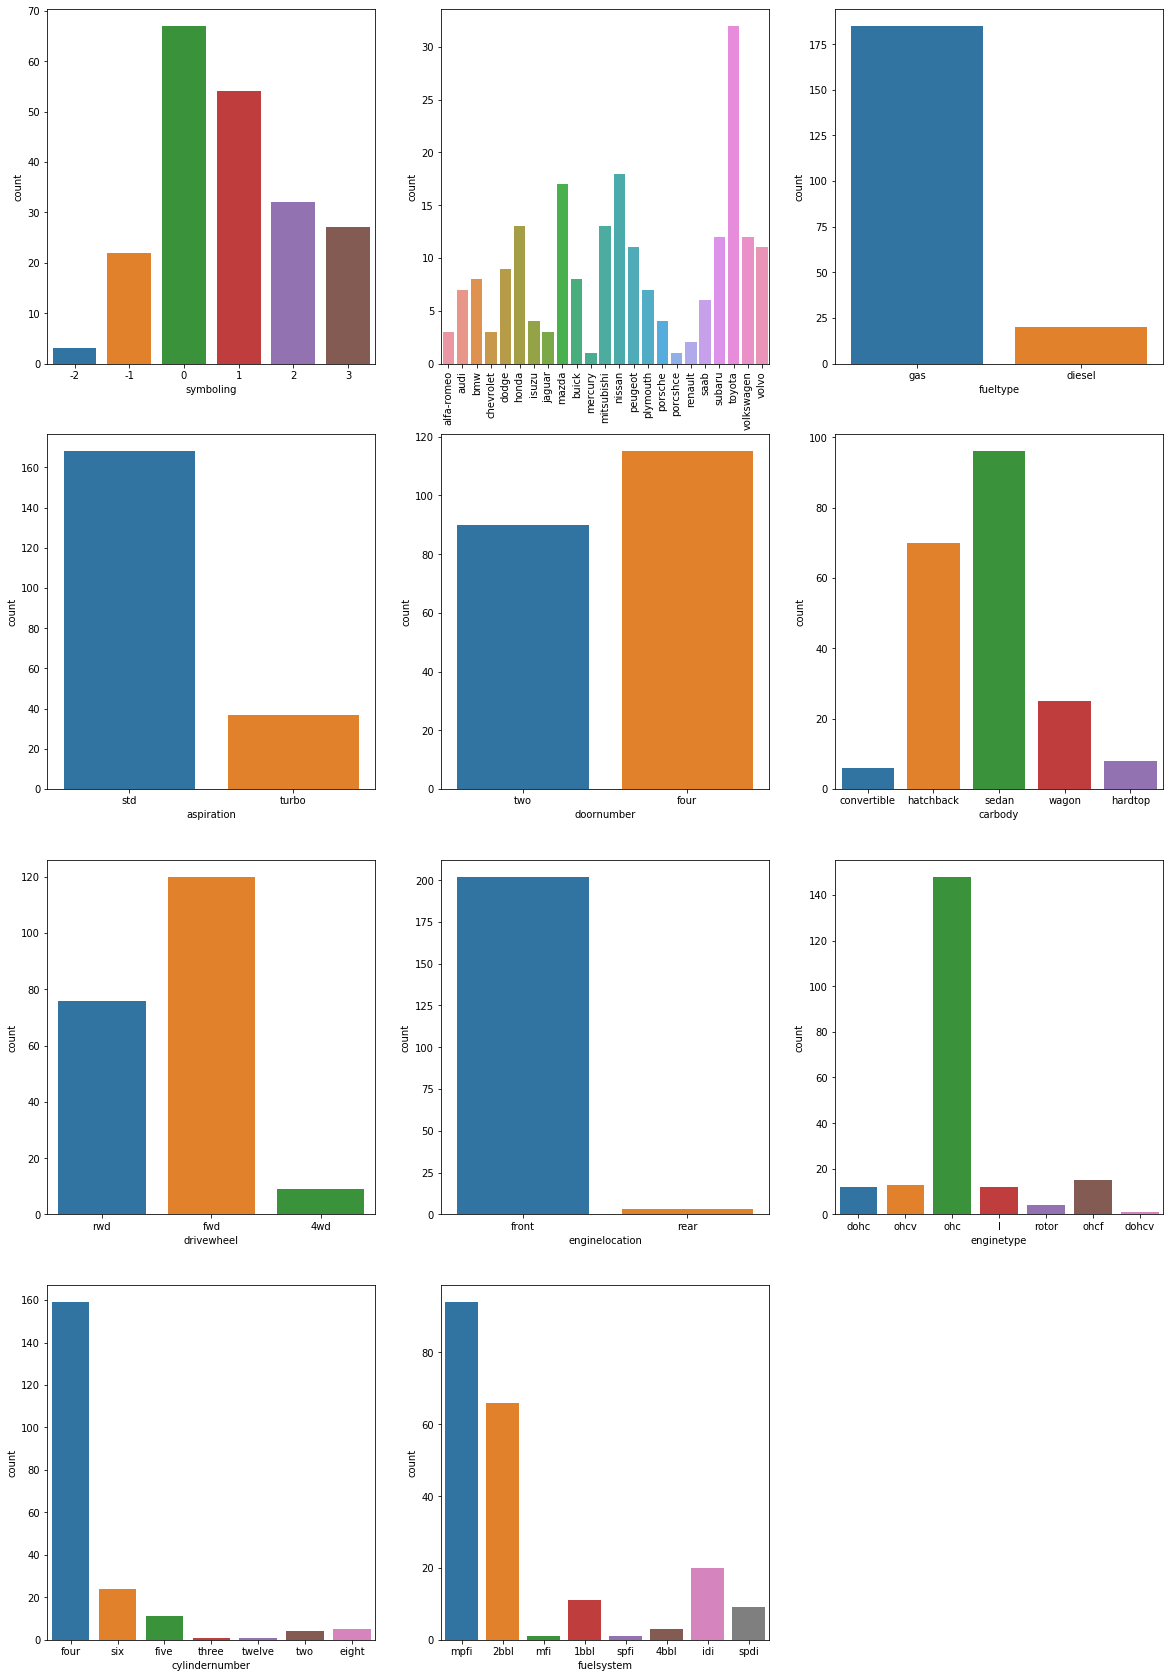

In [18]:
plt.figure(figsize=(20,30))
for i,j in enumerate(cat_column):
    plt.subplot(4,3,i+1)
    sns.countplot(pricing[j])
    if j=='company':
        plt.xticks(rotation=90)

-  It is very confident that American market is flooded with `gas fueled cars,standard aspiration, front sided engine location` and also people prefer `four cylinder engine with overhead camshaft(ohc)`.
-  Most vehicles are manufactured keeping the mid-range insurance risk rating of `0 and 1`.
-  `Sedan and hatchback` cars are produced widely in US.
-  **`Toyota`** produces maximum variety of models followed by `Nissan and Mazda` respectively

### Bivariate Analysis

Let's first compare the prices of cars with the companies

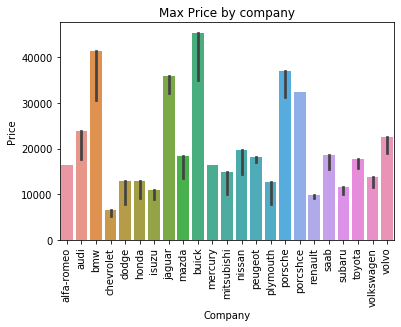

In [19]:
sns.barplot(x='company',y='price',data=pricing, estimator=max).set(xlabel='Company', ylabel='Price', title='Max Price by company')
ax=plt.xticks(rotation=90)

- Eventhough Toyota produces many models, all models has comparatively less price.

- `Buick, BMW, Porsche and Jaguar` manufactures top model cars with highest price.

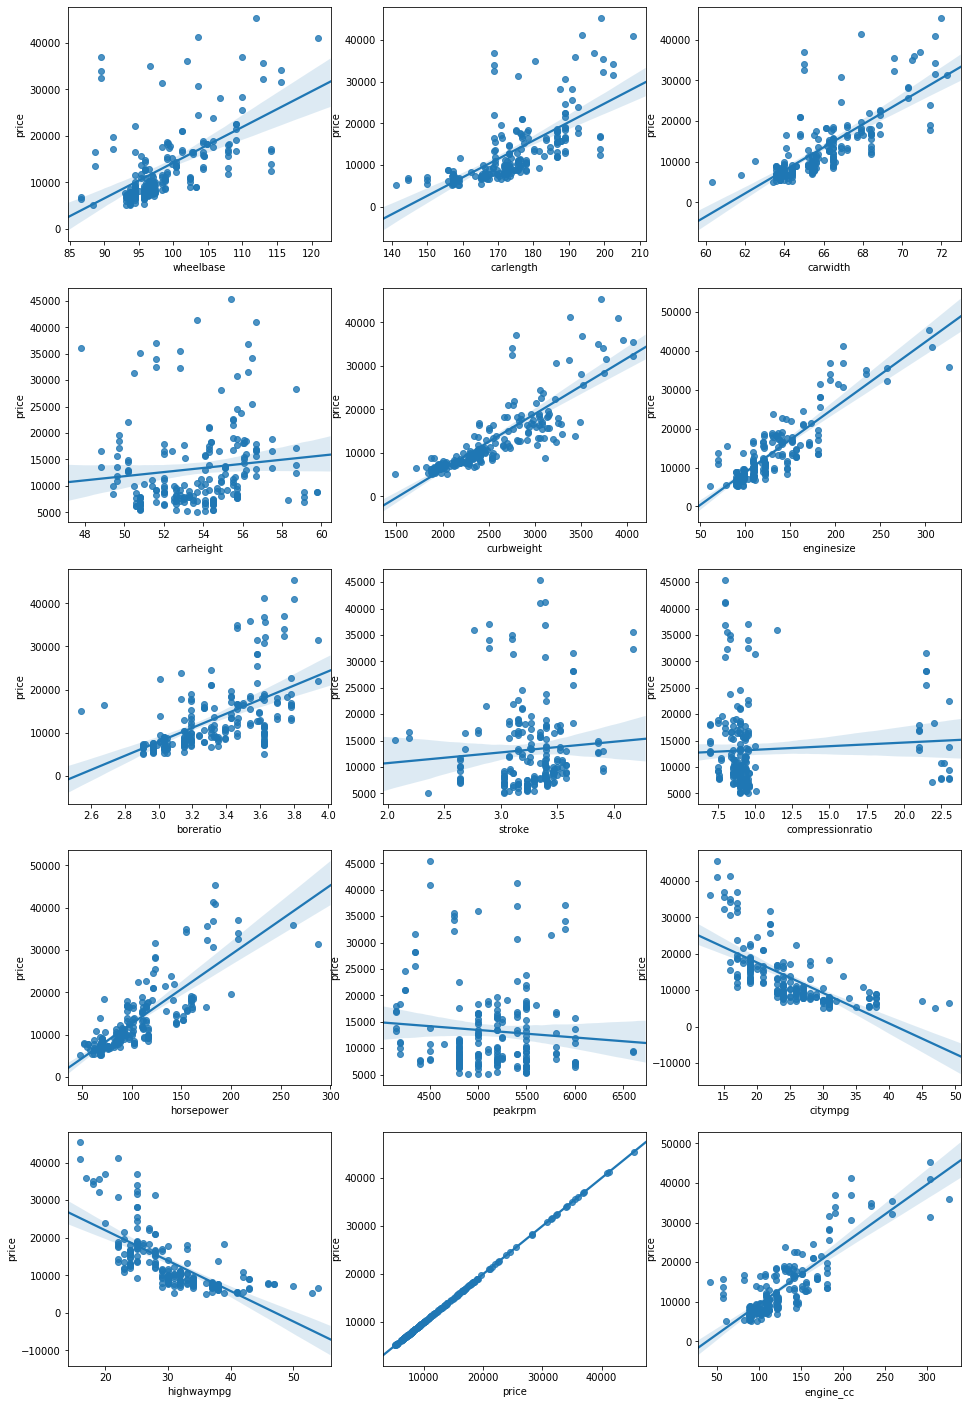

In [20]:
#Let's compare the prices column with all numerical type columns on Regression plot
plt.figure(figsize=(16,25))
for i,j in enumerate(num_column):
    plt.subplot(5,3,i+1)
    sns.regplot(data = pricing, y = 'price', x = j)

#### Inferences:

From the regression plots,
- Prices show a positive trend with **`wheelbase, carlength, carwidth, curbweight, engine size, horsepower and engine_cc`**
- On the other hand, prices show negative trends for **`citympg and highwaympg`**
- Also there is no relation of prices with **`carheight,peakrpm,stroke and compression ratio`**

Now, let's get a numerical inference of the above stated inferences by plotting correlation values on the heatmap

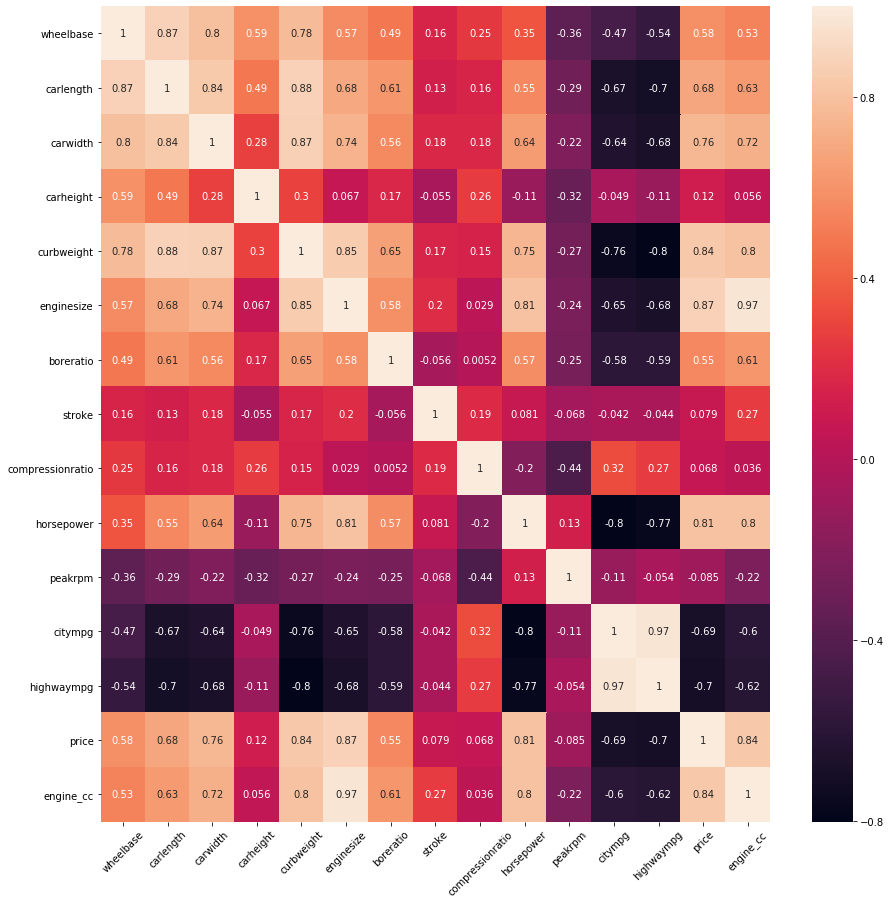

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(pricing.corr(),annot=True)
ax=plt.xticks(rotation=45)

As we can see, the inferences made in the previous regression plots are correct due to following reasons:

- __engine_cc,carlength, carwidth, curbweight, enginesize and horsepower__ shows high positive correlation while __citympg and highwaympg__ has high negative correlation.

- We could also see that there are clusters in the heatmap which suggests that there are variables/combination of variables which influences others.

- Since, we cannot drop the features just based on correlation as they might be explained well by more than one feature, let's not drop them at this stage.


## Data Preparation

As per the data dictionary, __`symboling`__ column has ordered categorical column. We could use the Label Encoding feature for this variable

In [22]:
en=LabelEncoder()
pricing.symboling = en.fit_transform(pricing.symboling)
pricing.head()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,engine_cc
0,5,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000,101.377976
1,5,alfa-romeo,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000,101.377976
2,3,alfa-romeo,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000,117.446531
3,4,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000,108.695147
4,4,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000,135.868934


### Dummy Variables

Let's create the dummy variables for the categorical columns

In [23]:
#First drop the symboling column name from the categorical list
cat_column.remove('symboling')
cat_column

['company',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [24]:
#Let's create the dummy columns for the remaining columns
dummies = pd.get_dummies(pricing[cat_column], drop_first =True)

#Now let's add these columns to the original dataframe by dropping the old columns
pricing = pd.concat([pricing, dummies], axis=1).drop(columns=cat_column)

pricing.shape

(205, 67)

In [25]:
#Check the head of the dataset now
pricing.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,engine_cc,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,5,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000,101.377976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000,101.377976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,94.500000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000,117.446531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,99.800000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000,108.695147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,4,99.400000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000,135.868934,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Model Building

### Train - Test Split

In [26]:
df_train, df_test = train_test_split(pricing, train_size= 0.7, test_size= 0.3, random_state = 100)

In [27]:
df_train.shape

(143, 67)

In [28]:
df_test.shape

(62, 67)

In [29]:
columns = list(df_train.columns)
columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'engine_cc',
 'company_audi',
 'company_bmw',
 'company_buick',
 'company_chevrolet',
 'company_dodge',
 'company_honda',
 'company_isuzu',
 'company_jaguar',
 'company_mazda',
 'company_mercury',
 'company_mitsubishi',
 'company_nissan',
 'company_peugeot',
 'company_plymouth',
 'company_porcshce',
 'company_porsche',
 'company_renault',
 'company_saab',
 'company_subaru',
 'company_toyota',
 'company_volkswagen',
 'company_volvo',
 'fueltype_gas',
 'aspiration_turbo',
 'doornumber_two',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumb

### Rescaling the Features

Now we will rescale the data by **MinMax** scaling

In [30]:
scaler = MinMaxScaler()

In [31]:
df_train[num_column] = scaler.fit_transform(df_train[num_column])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,engine_cc,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,3,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.150000,0.083333,0.551020,0.500000,0.567568,0.068818,0.121850,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,5,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.156250,0.395833,0.551020,0.166667,0.270270,0.466890,0.352697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,3,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324,0.122110,0.166663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.125000,0.262500,0.346939,0.222222,0.270270,0.314446,0.165928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.031250,0.475000,0.387755,0.111111,0.135135,0.382131,0.271036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Dividing into X and y sets for Model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train

In [33]:
#Let's first find the statistics with all the features present
print(sm.OLS(y_train, sm.add_constant(X_train)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     63.99
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           4.70e-51
Time:                        22:04:33   Log-Likelihood:                 289.41
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                      84   BIC:                            -286.0
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

### RFE Method

Since we have total **`66`** columns to evaluate, it is time consuming process to build the model by eliminating features manually. Here we could use automated technique called **Recursive Feature Elimination [RFE]** to simplify our model building process

We will perform RFE to get `20` top ranked variables and inspect those further manually by eliminating one-by-one

In [34]:
#Running RFE with the output number of variables equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,20)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 44),
 ('wheelbase', False, 11),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 24),
 ('peakrpm', False, 17),
 ('citympg', False, 21),
 ('highwaympg', False, 22),
 ('engine_cc', True, 1),
 ('company_audi', False, 36),
 ('company_bmw', True, 1),
 ('company_buick', False, 33),
 ('company_chevrolet', False, 20),
 ('company_dodge', False, 12),
 ('company_honda', False, 19),
 ('company_isuzu', False, 29),
 ('company_jaguar', False, 8),
 ('company_mazda', False, 32),
 ('company_mercury', False, 43),
 ('company_mitsubishi', False, 7),
 ('company_nissan', False, 30),
 ('company_peugeot', True, 1),
 ('company_plymouth', False, 10),
 ('company_porcshce', False, 45),
 ('company_porsche', True, 1),
 ('company_renault', False, 25),
 ('company_saab', False, 5),
 ('company_subaru', False, 31),
 ('co

#### List of columns we shall retain

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'engine_cc', 'company_bmw', 'company_peugeot',
       'company_porsche', 'enginelocation_rear', 'enginetype_l',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_idi'],
      dtype='object')

#### List of columns we will be dropping based on RFE

In [37]:
#
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'company_audi', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_plymouth',
       'company_porcshce', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

Let's first create some functions to use further

In [38]:
def get_linear_regression_model(y_train, X_train):
    X_train = sm.add_constant(X_train)
    return X_train, sm.OLS(y_train, X_train).fit()

In [39]:
def get_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [40]:
def get_model_and_print_summary(X):
    X_train, lm = get_linear_regression_model(y_train, X)
    print(lm.summary())
    print('\n\nVIF Values\n')
    print(get_vif(X_train))
    return X_train, lm 

#### Model 1

In [41]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [42]:
X_train1,lm1 = get_model_and_print_summary(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.74e-68
Time:                        22:04:34   Log-Likelihood:                 222.84
No. Observations:                 143   AIC:                            -407.7
Df Residuals:                     124   BIC:                            -351.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41

__compressionratio__ is insignificant since it has a p-value of 0.371. Hence, let's drop it and rebuild the model

#### Model 2

In [43]:
X_train2, lm2 = get_model_and_print_summary(X_train1.drop('compressionratio', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           2.30e-69
Time:                        22:04:34   Log-Likelihood:                 222.38
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     125   BIC:                            -355.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.43

__cylindernumber_six__ has p-value of 0.078 which appears to be insignificant. So, let's drop it

#### Model 3

In [44]:
X_train3, lm3 = get_model_and_print_summary(X_train2.drop('cylindernumber_six', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           9.35e-70
Time:                        22:04:34   Log-Likelihood:                 220.60
No. Observations:                 143   AIC:                            -407.2
Df Residuals:                     126   BIC:                            -356.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

P-value of __engine_cc__ has increased and become insignificant. So, will drop that 

#### Model 4

In [45]:
X_train4, lm4 = get_model_and_print_summary(X_train3.drop('engine_cc', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.85e-70
Time:                        22:04:34   Log-Likelihood:                 219.62
No. Observations:                 143   AIC:                            -407.2
Df Residuals:                     127   BIC:                            -359.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

__fuelsystem_idi__ has 0.05 p-value which makes it insignificant. We shall drop that column

#### Model 5

In [46]:
X_train5, lm5 = get_model_and_print_summary(X_train4.drop('fuelsystem_idi', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.03e-70
Time:                        22:04:34   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Now, eventhough we have P-values within acceptable range, we want VIF **less than 5** . We will now remove __cylindernumber_two__ as it has high VIF value

#### Model 6

In [47]:
X_train6, lm6 = get_model_and_print_summary(X_train5.drop('cylindernumber_two', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.03e-70
Time:                        22:04:35   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

__company_peugeot__ will be dropped now

#### Model 7

In [48]:
X_train7, lm7 = get_model_and_print_summary(X_train6.drop('company_peugeot', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.03e-70
Time:                        22:04:35   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Still the VIF values are not below 5 and the model is still not significant. We will now drop the next high VIF column __enginesize__ 

#### Model 8

In [49]:
X_train8, lm8 = get_model_and_print_summary(X_train7.drop('enginesize', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.01e-61
Time:                        22:04:35   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

Now, P-values has become insignificant, we will remove those columns first by removing **cylindernumber_five** column as it has very high p-value of 0.733

#### Model 9

In [50]:
X_train9, lm9 = get_model_and_print_summary(X_train8.drop('cylindernumber_five', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           4.93e-62
Time:                        22:04:35   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     130   BIC:                            -314.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

Next we will remove __cylindernumber_four__ having high p-value of 0.962

#### Model 10

In [51]:
X_train10, lm10 = get_model_and_print_summary(X_train9.drop('cylindernumber_four', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           4.37e-63
Time:                        22:04:35   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

We will drop the __stroke__ variable because it has p-value of 0.478

#### Model 11

In [52]:
X_train11, lm11 = get_model_and_print_summary(X_train10.drop('stroke', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           4.72e-64
Time:                        22:04:35   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

__enginetype_rotor__ can be dropped now with 0.145 p-value

#### Model 12

In [53]:
X_train12, lm12 = get_model_and_print_summary(X_train11.drop('enginetype_rotor', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.09e-64
Time:                        22:04:35   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

P-values are within acceptable range now but need to treat VIF to become less than 5. Will drop __curbweight__ now, having high VIF of all

#### Model 13

In [54]:
X_train13, lm13= get_model_and_print_summary(X_train12.drop('curbweight', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     85.93
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.62e-49
Time:                        22:04:36   Log-Likelihood:                 146.59
No. Observations:                 143   AIC:                            -275.2
Df Residuals:                     134   BIC:                            -248.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

__company_porsche__ has gone up with p-value. We shall drop it then

#### Model 14

In [55]:
X_train14, lm14= get_model_and_print_summary(X_train13.drop('company_porsche', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     98.79
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.90e-50
Time:                        22:04:36   Log-Likelihood:                 146.51
No. Observations:                 143   AIC:                            -277.0
Df Residuals:                     135   BIC:                            -253.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

Still p-values of the model are not significant. Will drop the next highest p-value column __boreratio__

#### Model 15

In [56]:
X_train15, lm15= get_model_and_print_summary(X_train14.drop('boreratio', axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           8.36e-51
Time:                        22:04:36   Log-Likelihood:                 146.01
No. Observations:                 143   AIC:                            -278.0
Df Residuals:                     136   BIC:                            -257.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

__P-values__ seems to be low, __F-statistic__ is good and __VIF__ values are below 5. We seem to have found our model. Time to evaluate.

## Residual Analysis of the Trained data

In [57]:
y_train_predicted = lm15.predict(X_train15)

Text(0.5, 0, 'Errors')

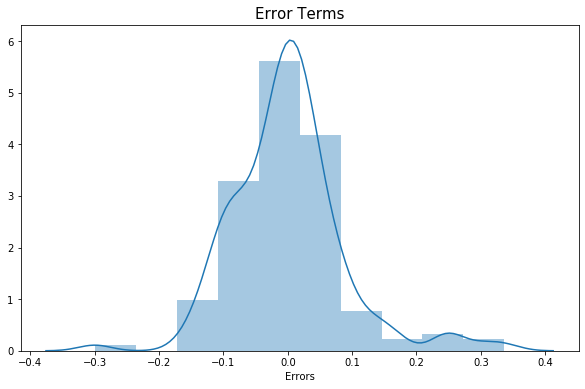

In [58]:
plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_train_predicted), bins = 10).set_title('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 10)

The __error terms__ are following the __normal distribution__ which is one of our major assumptions regarding the __Linear Regression__.

## Making Predictions

#### Applying Scaling on the Test Data


In [59]:
df_test[num_column] = scaler.transform(df_test[num_column])

df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,engine_cc,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,2,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.125000,0.091667,0.265306,0.694444,0.810811,0.072382,0.149174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,4,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.125000,0.154167,0.448980,0.388889,0.459459,0.093295,0.193101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,3,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.100000,0.150000,0.265306,0.361111,0.405405,0.102964,0.243962,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,3,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324,0.115479,0.166663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
140,4,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.106250,0.104167,0.102041,0.361111,0.378378,0.068652,0.193065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [60]:
y_test = df_test.pop('price')
X_test = df_test

In [61]:
#Let's use our model to make predictions

# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train15.columns]

In [62]:
#Predicting the test data
y_pred = lm15.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

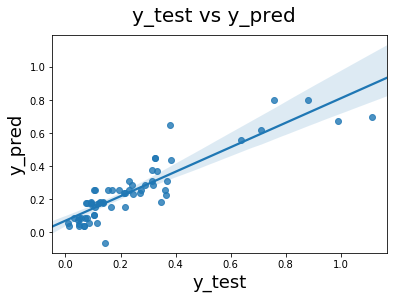

In [64]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(y=y_pred,x=y_test)
fig.suptitle('y_test vs y_pred',fontsize=20)          #Plotting head
plt.xlabel('y_test',fontsize=18)                      #Plot X-label
plt.ylabel('y_pred',fontsize=18)                      #Plot Y-label

In [ ]:
lm15.params

We can see that the equation of our best fitted line equation is:

$ Price = -0.238257 + 0.957915 * carwidth + 0.329840 * company\_bmw + 0.661758 * enginelocation\_rear - 0.119448 * enginetype\_l +  0.358617 * cylindernumber\_three + 0.269211 * cylindernumber\_twelve $

The variables which are significant for predicting the car price are
- carwidth
- enginesize
- company
- enginelocation
- enginetype
- cylindernumber

The relation of these variables with price is given by the above equation among which __carwidth__ & __enginelocation__ at __rear location__ have the maximum effect on price while the __3 & 12 cylinders engine__ along with __BMW company's car__ also does affect the price significantly.

## R-squared score

In [ ]:
r2_score(y_test, y_pred)

Thus, we have a __R-squared__ of `0.836` on train data and `0.798` on test data which signifies that the model we arrived at worked well on test data.